In [1]:
import os
import sys
import numpy as np
import random
from astropy.table import Table
import h5py
import matplotlib#; matplotlib.use('Agg')
matplotlib.rcParams['figure.subplot.wspace'] = 0.2
matplotlib.rcParams['figure.subplot.hspace'] = 0.2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

DATA_PATH = '/scratch/users/sowmyak/resid/'
CODE_PATH = '/home/users/sowmyak/ResidualDetectron/scripts'
sys.path.append(CODE_PATH)
import plot_utils

/home/users/sowmyak/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filename = os.path.join(DATA_PATH, "data",  "resid_val_blend_full.h5")
with h5py.File(filename, 'r') as hf:
    full_blend = hf['blend_images'][:]
    

filename = os.path.join(DATA_PATH, "data", "resid_val.h5")
with h5py.File(filename, 'r') as hf:
    X = hf['resid_images'][:]
assert not np.any(np.isnan(X))
filename = os.path.join(DATA_PATH, "data", "resid_val.csv")
Y = pd.read_csv(filename)


full_cat = Table.read(DATA_PATH + '/data/resid_val_full.fits', format='fits')

### Overview of validation sample

Two galaxy blend images(rightmost panel) was run through LSST stack with only one detected centroid (cyan star) per blended image. The blend was fit by scarlet with a source initialized  at the stack detected centroid. The scarlet fit image with updated center (green dot) is shown in the middle panel. The residual image is shown on the leftmost image. The true centers of the brighter galaxy (red x) and fainter galaxy (blue x) are also shown.

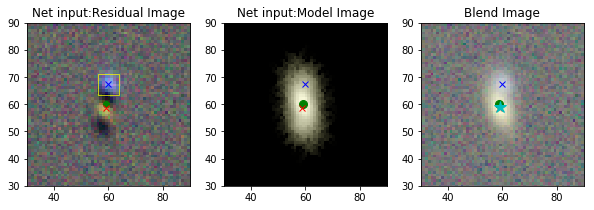

In [3]:
image_id = np.random.randint(0, len(full_cat))
plot_utils.plot_input(full_blend, X, Y, image_id)

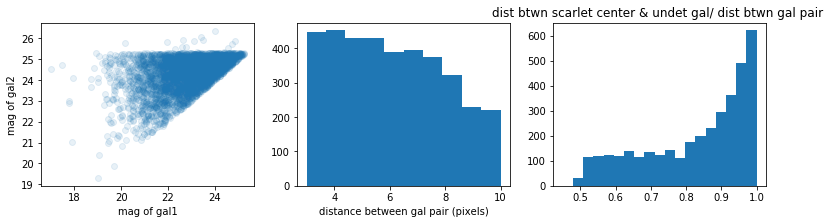

In [4]:
indxs = ~np.isnan(list(Y['scrlt_y0']))
plot_utils.plot_hist(full_cat, Y, indxs )

### Scarlet fit centers that were more than 10 pixels away from either galaxy

In these 4 cases scarlet failed to successsefuly converge to a solution. The fit centroids are either more than 10 pixels from either galaxy, or nan or negative.

 Number of predictions with other galaxy detected  4
id 1007 , number of scarlet iterations:  93 , multi-comp fit True
scarlet_center (44.71884808260575, 71.14791120104744)


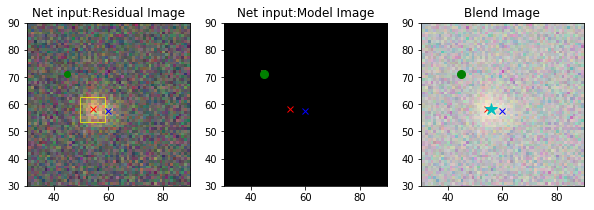

id 1221 , number of scarlet iterations:  200 , multi-comp fit True
scarlet_center (nan, nan)


/home/users/sowmyak/.local/lib/python3.6/site-packages/scarlet-0.3.b34b32b-py3.6-linux-x86_64.egg/scarlet/display.py:74: RuntimeWarning: invalid value encountered in true_divide
  return np.ma.array(np.arcsinh(self.Q*(value-self.vmin)/self.data_range)/self.Q)
/home/users/sowmyak/.local/lib/python3.6/site-packages/scarlet-0.3.b34b32b-py3.6-linux-x86_64.egg/scarlet/display.py:74: RuntimeWarning: invalid value encountered in double_scalars
  return np.ma.array(np.arcsinh(self.Q*(value-self.vmin)/self.data_range)/self.Q)


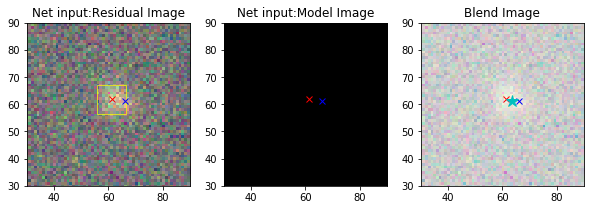

id 1851 , number of scarlet iterations:  200 , multi-comp fit True
scarlet_center (73.03536615509688, 51.844493793366354)


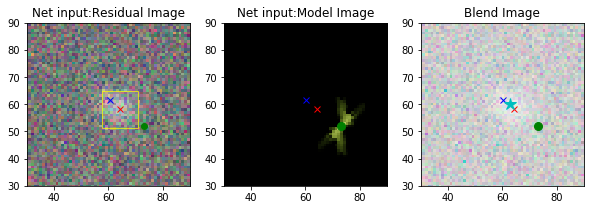

id 3190 , number of scarlet iterations:  140 , multi-comp fit True
scarlet_center (-4.1220741607299445, 122.92686037306193)


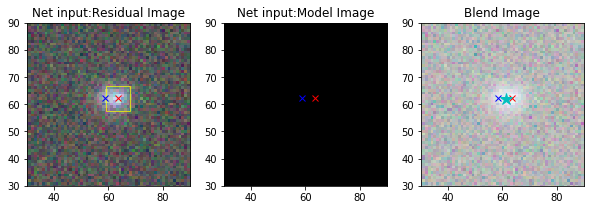

In [6]:
q, = np.where(Y['input_indxs'] == 2)
print(" Number of predictions with other galaxy detected ", len(q))
for image_id in q:
    print('id', image_id,
          ', number of scarlet iterations: ', Y['niters'][image_id], 
          ', multi-comp fit', Y['mult_comp'][image_id])
    print('scarlet_center', (Y['scrlt_y0'][image_id], Y['scrlt_x0'][image_id]) )
    plot_utils.plot_input(full_blend, X, Y, image_id)

### Blends where Scarlet did not converge

The scarlet model was fit with default maximum number of 200 iterations. For 239 images the solutions did not converge.

 Number of blends with unconverged solutions  239
id: 922 ; number of scarlet iterations: 200 ; multi-comp fit: True


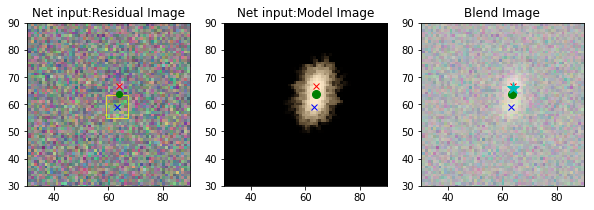

id: 2178 ; number of scarlet iterations: 200 ; multi-comp fit: True


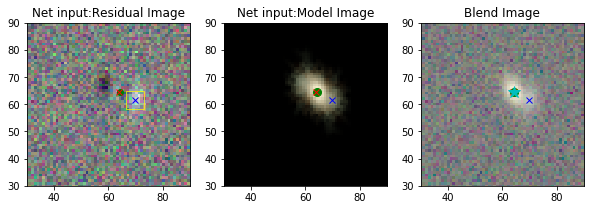

id: 2471 ; number of scarlet iterations: 200 ; multi-comp fit: True


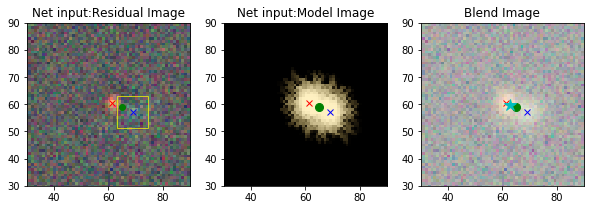

id: 308 ; number of scarlet iterations: 200 ; multi-comp fit: True


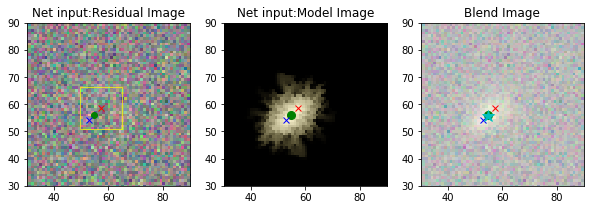

id: 413 ; number of scarlet iterations: 200 ; multi-comp fit: True


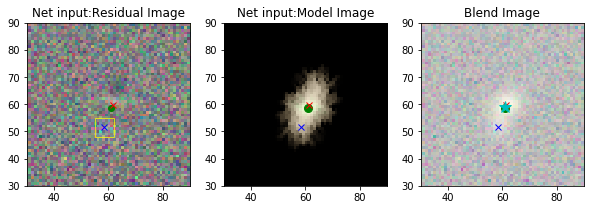

id: 2928 ; number of scarlet iterations: 200 ; multi-comp fit: True


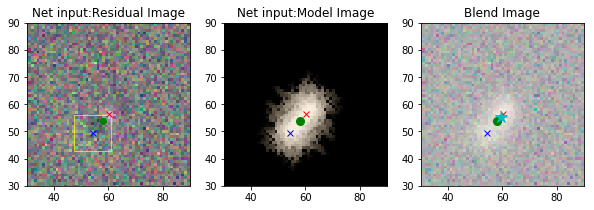

id: 26 ; number of scarlet iterations: 200 ; multi-comp fit: True


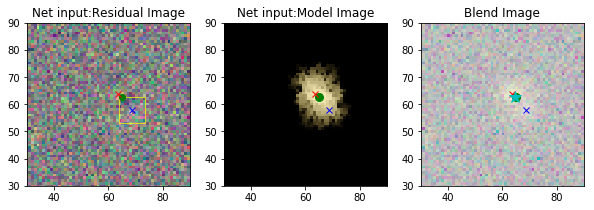

id: 3418 ; number of scarlet iterations: 200 ; multi-comp fit: True


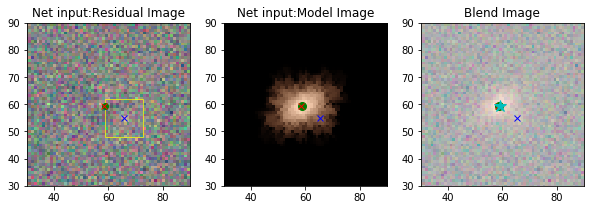

id: 911 ; number of scarlet iterations: 200 ; multi-comp fit: True


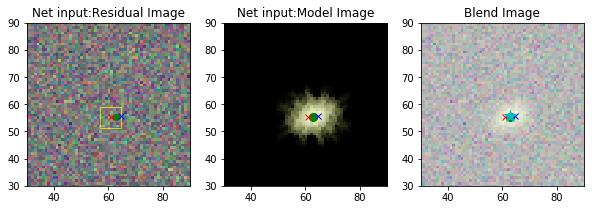

id: 1866 ; number of scarlet iterations: 200 ; multi-comp fit: True


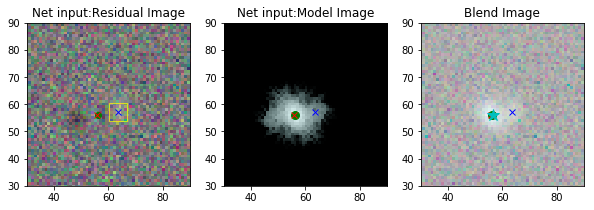

In [7]:
q, = np.where((Y['niters'] == 200) & (Y['input_indxs'] != 2))
print(" Number of blends with unconverged solutions ", len(q))
indxs = np.random.choice(q, 10, replace=False)
for image_id in indxs:
    print('id:', image_id,
          '; number of scarlet iterations:', Y['niters'][image_id], 
          '; multi-comp fit:', Y['mult_comp'][image_id])
    plot_utils.plot_input(full_blend, X, Y, image_id)

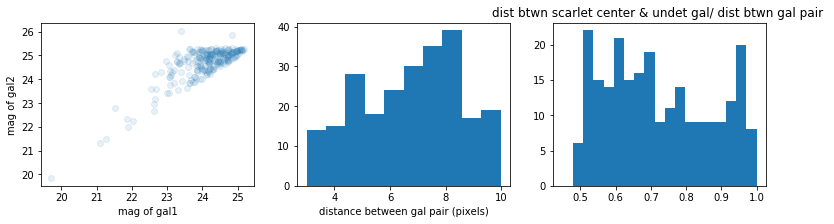

In [8]:
plot_utils.plot_hist(full_cat, Y, q )

### Single component per source fit
By default the scarlet source was initilized as being a 2-component source. In 32 cases the multi component fit failed and image was fit with a single component source.

 Number of blends with single component fit 32
id: 2472 ; number of scarlet iterations: 17 ; multi-comp fit: False


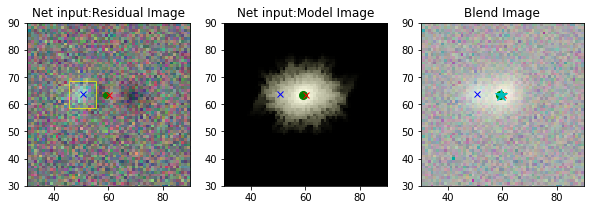

id: 2194 ; number of scarlet iterations: 15 ; multi-comp fit: False


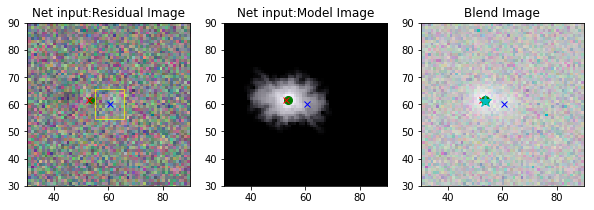

id: 2403 ; number of scarlet iterations: 13 ; multi-comp fit: False


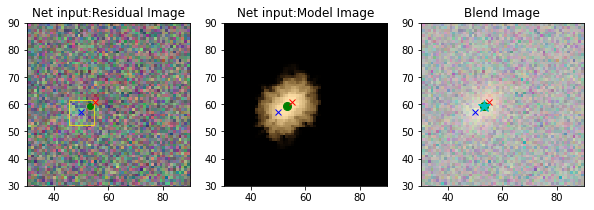

id: 2457 ; number of scarlet iterations: 8 ; multi-comp fit: False


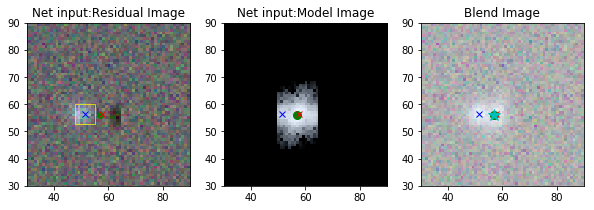

id: 1908 ; number of scarlet iterations: 8 ; multi-comp fit: False


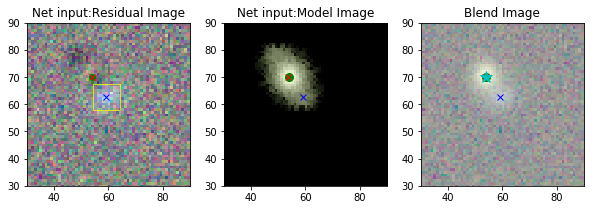

id: 105 ; number of scarlet iterations: 8 ; multi-comp fit: False


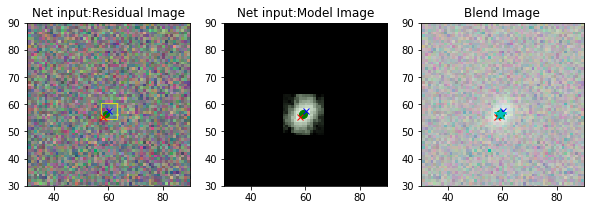

id: 3406 ; number of scarlet iterations: 8 ; multi-comp fit: False


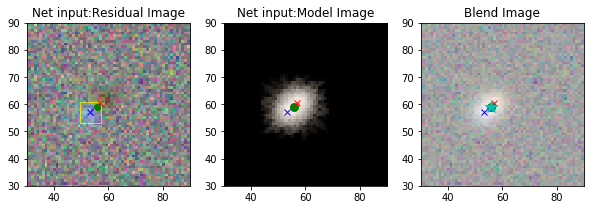

id: 3665 ; number of scarlet iterations: 8 ; multi-comp fit: False


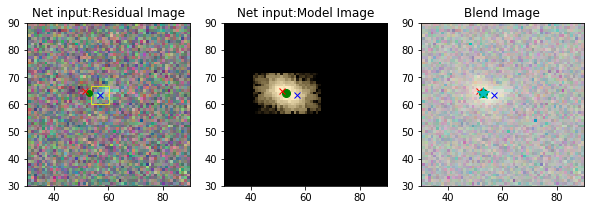

id: 1555 ; number of scarlet iterations: 17 ; multi-comp fit: False


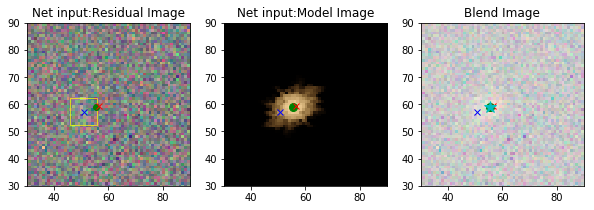

id: 1954 ; number of scarlet iterations: 9 ; multi-comp fit: False


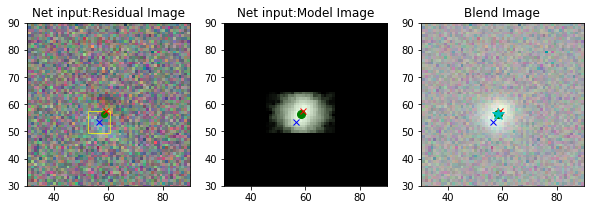

In [9]:
q, = np.where(Y['mult_comp'] == False)
print(" Number of blends with single component fit", len(q))
indxs = np.random.choice(q, 10, replace=False)
for image_id in indxs:
    print('id:', image_id,
          '; number of scarlet iterations:', Y['niters'][image_id], 
          '; multi-comp fit:', Y['mult_comp'][image_id])
    plot_utils.plot_input(full_blend, X, Y, image_id)

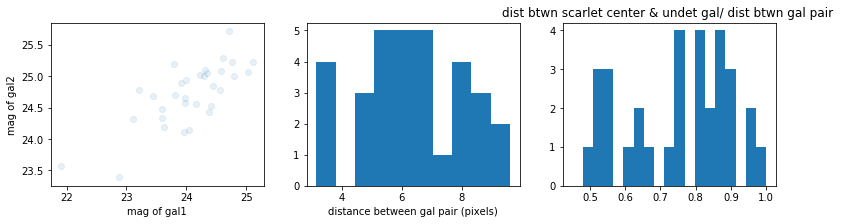

In [10]:
plot_utils.plot_hist(full_cat, Y, q )

### Scarlet fit of bright galaxies

 Number of blends with brighter galaxy i mag<20  89
id: 3429 ; number of scarlet iterations: 12 ; multi-comp fit: True


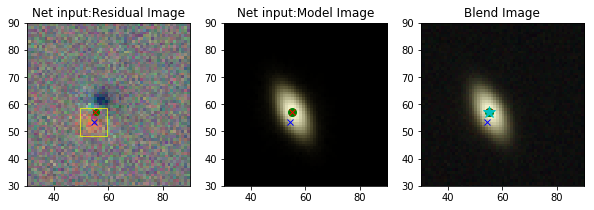

id: 2983 ; number of scarlet iterations: 13 ; multi-comp fit: True


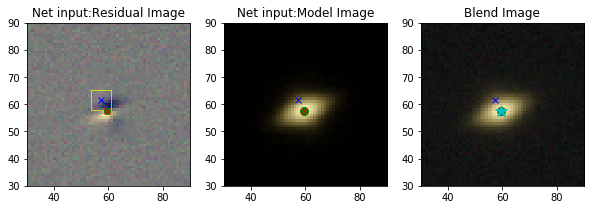

id: 969 ; number of scarlet iterations: 15 ; multi-comp fit: True


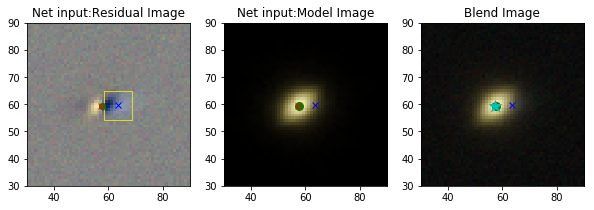

id: 2224 ; number of scarlet iterations: 13 ; multi-comp fit: True


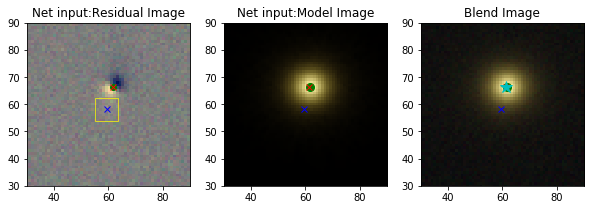

id: 3654 ; number of scarlet iterations: 15 ; multi-comp fit: True


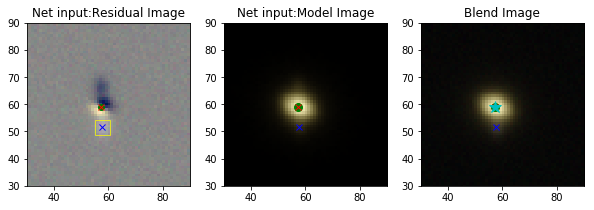

id: 2335 ; number of scarlet iterations: 15 ; multi-comp fit: True


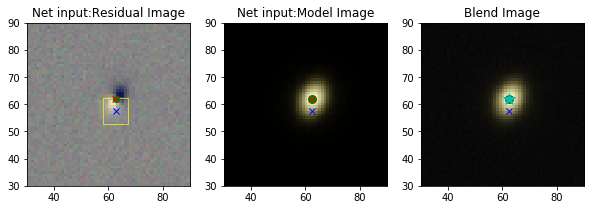

id: 116 ; number of scarlet iterations: 76 ; multi-comp fit: True


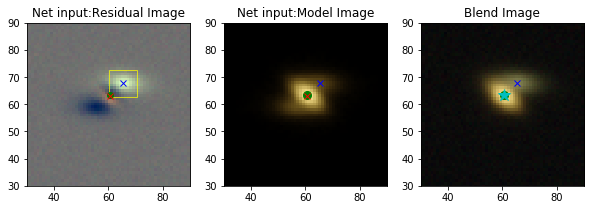

id: 2077 ; number of scarlet iterations: 15 ; multi-comp fit: True


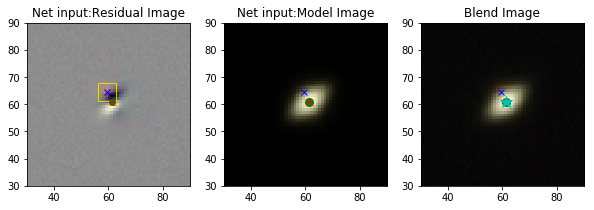

id: 128 ; number of scarlet iterations: 13 ; multi-comp fit: True


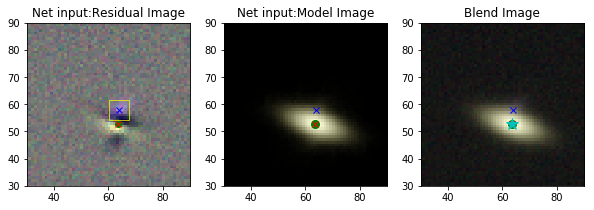

id: 2687 ; number of scarlet iterations: 12 ; multi-comp fit: True


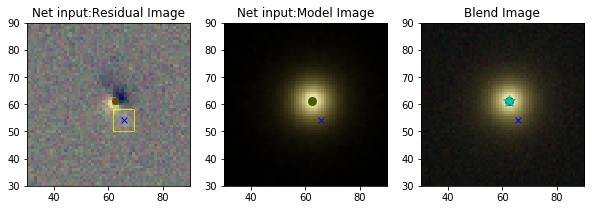

In [11]:
q, = np.where(full_cat['ab_mag_1'] <20)
print(" Number of blends with brighter galaxy i mag<20 ", len(q))
indxs = np.random.choice(q, 10, replace=False)
for image_id in indxs:
    print('id:', image_id,
          '; number of scarlet iterations:', Y['niters'][image_id], 
          '; multi-comp fit:', Y['mult_comp'][image_id])
    plot_utils.plot_input(full_blend, X, Y, image_id)

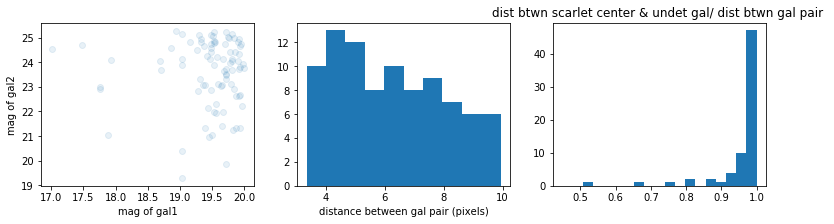

In [12]:
plot_utils.plot_hist(full_cat, Y, q )